In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Mouna\\OneDrive\\Pictures\\Desktop\\remade.csv")


In [3]:
df1 = df.copy(deep=True)
df1 = df1.drop(['the_geom','the_geom_webmercator','cartodb_id','rw_country_code','rw_country_name','country',
                'cri_rank','fatalities_per_100k_rank','fatalities_rank','losses_per_gdp__rank','losses_usdm_ppp_rank','world_label'],axis=1)


df1["losses_per_gdp__total"].fillna(0,inplace=True)

X = df1.iloc[:,2: ]
y = df1.iloc[:,1:2]
X

,fatalities_per_100k_total,fatalities_total,losses_per_gdp__total,losses_usdm_ppp_total
0,0.45,140,0.0001,1.229
1,0.01,1,0.6746,2797.884
2,0.05,22,0.0394,637.070
3,0.00,0,0.0000,0.000
4,0.00,0,0.0021,0.508
...,...,...,...,...
177,0.00,0,0.0000,0.000
178,0.00,0,0.0000,0.000
179,0.01,1,0.0012,0.130
180,0.00,0,0.0000,0.000


In [4]:
y

,cri_score
0,72.50
1,61.50
2,66.33
3,124.50
4,117.33
...,...
177,124.50
178,124.50
179,114.33
180,124.50


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


from sklearn.linear_model import LinearRegression
mreg = LinearRegression()
mreg.fit(X_train,y_train)

mreg.coef_

array([[-0.59671206, -0.01398239, -0.90332352, -0.0013504 ]])

In [6]:
mreg.intercept_

array([86.55768238])

In [7]:
y_pred = mreg.predict(X_test)
y_pred

array([[86.46879404],
       [86.55768238],
       [81.36525965],
       [86.55768238],
       [86.55768238],
       [79.75903302],
       [86.22365886],
       [86.47661096],
       [86.5056374 ],
       [80.89486156],
       [79.31221095],
       [86.55768238],
       [24.55908208],
       [86.15066803],
       [81.58020516],
       [86.49337022],
       [86.04207847],
       [84.86748505],
       [86.55768238],
       [85.59052857],
       [86.52623611],
       [86.52691016],
       [86.55768238],
       [85.94324149],
       [86.40137099],
       [83.68326913],
       [85.4260968 ],
       [82.38657772],
       [78.87431988],
       [85.86531858],
       [86.55768238],
       [85.16742898],
       [83.90906022],
       [82.35237368],
       [85.11605439],
       [86.30919442],
       [85.61527815]])

In [8]:
ms_score = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(np.sqrt(ms_score))
print(np.sqrt(r2))

30.839436251116805
0.3272811867673171


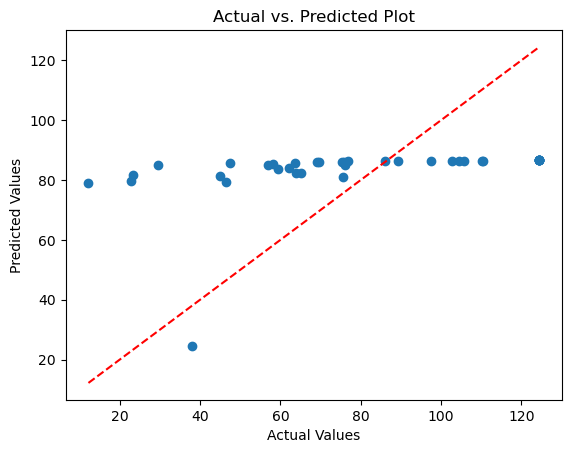

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Plot")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.show()